### Heart Disease Analysis - Hypothesis Testing

In this project, I’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository.

In [66]:
#Import General Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
#Load the dataset and investigate
heart_raw= pd.read_csv('uci_heart_disease.csv')
heart_raw.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [71]:
# create copy of dataset and perform some data cleaning
heart =heart_raw.copy()

heart_disease = {0: 'absence',
                 1: 'presence',
                 2: 'presence',
                 3: 'presence',
                 4: 'presence'
                 }

heart['num'] =heart['num'].map(heart_disease)

heart = heart.rename(columns={'num':'heart_disease'})

heart = heart.dropna()




In [89]:
#Split dataset into two subsets
yes_hd = heart[heart['heart_disease'] == 'presence'] # patients with heart disease
no_hd = heart[heart['heart_disease'] == 'absence'] # patients without heart disease


### Cholesterol Analysis
To start, I’ll investigate cholesterol levels for patients with heart disease. I'll use the dataset `yes_hd` to save cholesterol levels for patients with heart disease as a variable named `chol_hd`.

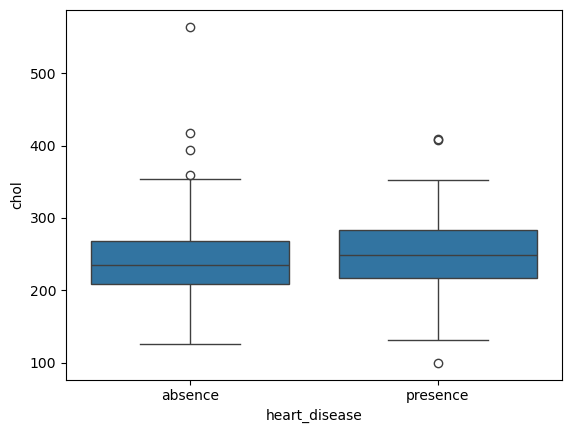

In [76]:
# box plot of `chol` based on heart disease
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()

In general, total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy). I'll first calculate the mean cholesterol level for patients who were diagnosed with heart disease and print it out. 

After I'llanswer the question, "Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? I'll import the function from `scipy.stats` to perform a one-sample T-Test, to test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

In [77]:
# get cholesterol levels for patients with heart disease
chol_hd = yes_hd.chol

# calculate mean cholesterol level for patients with hd
print(np.mean(chol_hd))

# Test if cholesterol is greater than 240 (right-tailed test)
from scipy import stats
t_stat, p_value = stats.ttest_1samp(chol_hd, popmean=240, alternative='greater')
print(f"Right-tailed test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

250.57553956834533
Right-tailed test: t-statistic = 2.4440, p-value = 0.0079


After running the one-sided test, we get a p value of `0.0079`.Using a significance threshold of 0.05 we can confidently say  patients with heart disease have an average cholesterol level significantly higher than 240 mg/dl.

Next we will check if patients without heart disease have average cholesterol levels significantly above 240 mg/dl?

In [78]:
# get cholesterol levels for patients with heart disease
chol_no_hd = no_hd.chol

# calculate mean cholesterol level for patients with hd
print(np.mean(chol_no_hd))

# Test if cholesterol is greater than 240 (right-tailed test)
from scipy import stats
t_stat, p_value = stats.ttest_1samp(chol_no_hd, popmean=240, alternative='greater')
print(f"Right-tailed test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

243.49375
Right-tailed test: t-statistic = 0.8221, p-value = 0.2061


Despite having an average cholesterol level above 240 mg/dl, we fail to reject the null hypothesis as the p-value of `0.2061` is above our treshold of `0.05`.

### Fasting Blood Sugar Analysis

Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes).

We will check to see if this sample was representative of the population at the time, and calculate approximately how many people we would expect to have diabetes in the sample?

 The fbs column of this dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl (TRUE means that their fasting blood sugar was greater than 120 mg/dl; FALSE means it was less than or equal to 120 mg/dl).

In [85]:
# calculate number of patients total
num_patients = len(heart)
print(f"Number of patients in sample: {num_patients}")

# calculate number of patients with fbs>120
num_highfbs_patients = np.sum(heart.fbs)
print(num_highfbs_patients)

# calculate 8% of sample size
print(0.08*num_patients)

# run binomial test
from scipy.stats import binomtest
result = binomtest(num_highfbs_patients, num_patients, .08, alternative='greater')
print(f"Two-sided test:")
print(f"P-value: {result.pvalue:.6f}")
print(f"95% Confidence Interval: {result.proportion_ci()}")

Number of patients in sample: 299
43
23.92
Two-sided test:
P-value: 0.000142
95% Confidence Interval: ConfidenceInterval(low=0.1115113717425902, high=1.0)


The binom_test() function takes four parameters (in order):

- The observed number of “successes” (in this case, the number of people in the sample who had fasting blood sugar greater than 120 mg/dl)

- The number of “trials” (in this case, the number of patients)

- The null probability of “success” (in this case, 0.08)

- The alternative parameter, which indicates the alternative hypothesis for the test (eg.,'two-sided' 'greater' or 'less')


After running the test, we get a p-value of `0.000142`. This is less than 0.05, indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl.

### Predictors of Heart Disease

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease?

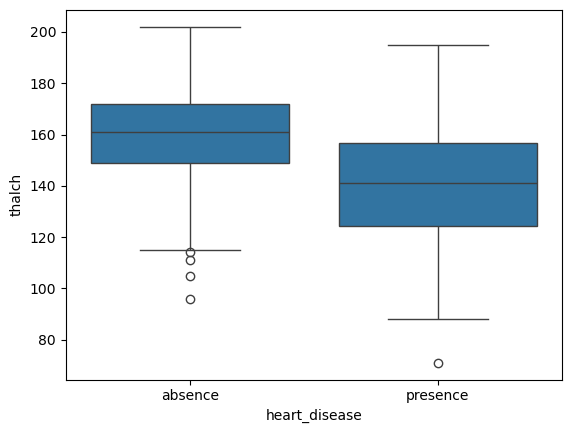

In [87]:
# box plot of `thalach` based on heart disease
sns.boxplot(x=heart.heart_disease, y=heart.thalch)
plt.show()

In [88]:
# save `thalach` for hd patients and non-hd patients
thalach_hd = heart.thalch[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalch[heart.heart_disease == 'absence']

First we will calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

Next, we'll find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

We will test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.




In [93]:
# calculate and print mean difference
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print(f"`thalach` mean Difference: {mean_diff}")

# calculate and print median difference
mean_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print(f"`thalach` median Difference: {mean_diff}")

# run two-sample t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(f"p-value for `thalach` two-sample t-test: {pval}")

`thalach` mean Difference: 19.90499100719427
`thalach` median Difference: 20.0
p-value for `thalach` two-sample t-test: 6.805828995165681e-15


After running the two-sample t-test, we get a p-value of 6.805828995165681e-15. This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

### Chest Pain and Max Heart Rate

Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences.

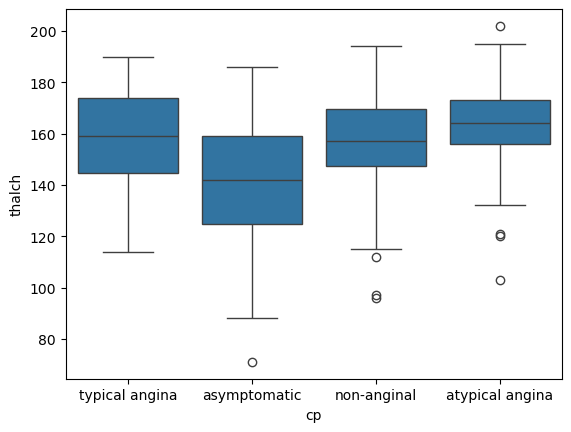

In [96]:
# box plot of `thalach` based on `cp`
sns.boxplot(x=heart.cp, y=heart.thalch)
plt.show()


In [100]:
# save `thalach` based on `cp`
thalach_typical = heart.thalch[heart.cp == 'typical angina']
thalach_asymptom = heart.thalch[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalch[heart.cp == 'non-anginal']
thalach_atypical = heart.thalch[heart.cp == 'atypical angina']

Next, we will run hypothesis test to address the following null and alternative hypotheses:

-Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.

-Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach

In [102]:
# run ANOVA
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, 
                       thalach_asymptom, 
                       thalach_nonangin, 
                       thalach_atypical)

print("One-Way ANOVA Results:")
print(f"P-value: {pval}")

One-Way ANOVA Results:
P-value: 4.6848415793401575e-11


After running an ANOVA test we concluded that there is at least one pair of chest pain types (`cp`) for which people with those pain types have significantly different average max heart rates during exercise (`thalach`).

We will run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.


In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Run Tukey HSD using statsmodels
tukey_sm = pairwise_tukeyhsd(endog=heart.thalch, groups=heart.cp, alpha=0.05)

print("\nStatsmodels Tukey HSD Results:")
print(tukey_sm)



Statsmodels Tukey HSD Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
   asymptomatic atypical angina  22.6779    0.0  13.5702 31.7856   True
   asymptomatic     non-anginal     15.4    0.0   7.8107 22.9893   True
   asymptomatic  typical angina  15.8385 0.0058   3.4727 28.2043   True
atypical angina     non-anginal  -7.2778 0.2322 -17.1989  2.6432  False
atypical angina  typical angina  -6.8394 0.5831 -20.7586  7.0798  False
    non-anginal  typical angina   0.4384 0.9998 -12.5381  13.415  False
-----------------------------------------------------------------------


Maybe surprisingly, people who are '`asymptomatic`' seem to have a lower maximum heart rate (associated with heart disease) than people who have other kinds of chest pain.

#### Heart Disease and Chest Pain

Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease.

We will run a hypothesis test for the following null and alternative hypotheses:

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.


In [108]:
# contingency table of heart disease vs cp
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

# run chi-square test
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)



heart_disease    absence  presence
cp                                
asymptomatic          39       105
atypical angina       40         9
non-anginal           65        18
typical angina        16         7
p-value for chi-square test:  5.250756261663884e-17


 We calculate a p-value of `5.250756261663884e-17`. This is less than 0.05, so we can conclude that there is a significant association between these variables.